In [1]:
%run 'mis_integradores.ipynb'
from pylab import *
%matplotlib inline

Hay que resolver $$\frac{d ^2 \vec \rho}{d \tau ^2} = -\frac{\hat \rho}{\rho ^2}$$

In [2]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array ([drx,dry,dvrx,dvry])

CPU times: user 34.3 ms, sys: 1.99 ms, total: 36.3 ms
Wall time: 36.3 ms


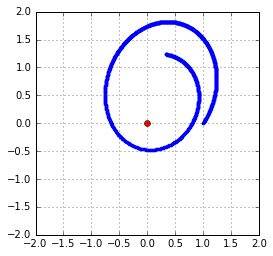

In [3]:
%%time
r_vr,t = RK2(mov_planeta,[1,0,0.6,0.9],[0,10],0.01)
plot(r_vr[:,0],r_vr[:,1],'.')
plot([0],'ro')
axes().set_aspect( 'equal' ),grid(True)
xlim([-2,2]),ylim([-2,2])

In [4]:
def jac_mov_planetas(x,t):
    dx = array([0,0,0,0])
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rx2mry2 = (2*x[0]*x[0]-x[1]*x[1])/r5
    ry2mrx2 = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry = 3*x[0]*x[1]/r5
    jac= array([[0,0,1,0],[0,0,0,1],[rx2mry2,rxry,0,0],[rxry,ry2mrx2,0,0]])
    return dx,jac

CPU times: user 37.6 ms, sys: 841 µs, total: 38.5 ms
Wall time: 37.9 ms


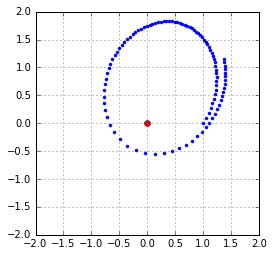

In [5]:
%%time
t,r_vr = integra2(mov_planeta,jac_mov_planetas,[1,0,0.6,0.9],[0,10],0.1)
plot(r_vr[:,0],r_vr[:,1],'.')
plot([0],'ro')
axes().set_aspect( 'equal' ),grid(True)
xlim([-2,2]),ylim([-2,2])

CPU times: user 29.9 ms, sys: 0 ns, total: 29.9 ms
Wall time: 29.3 ms


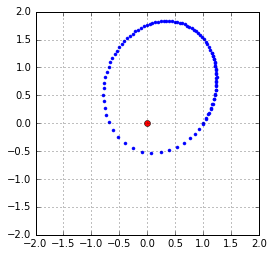

In [6]:
%%time
r_vr,t = RK4(mov_planeta,[1,0,0.6,0.9],[0,10],0.1)
plot(r_vr[:,0],r_vr[:,1],'.')
plot([0],'ro')
axes().set_aspect( 'equal' ),grid(True)
xlim([-2,2]),ylim([-2,2])

In [7]:
from scipy.integrate import *

In [8]:
h=0.1
tiempos=arange(0,10,h)

CPU times: user 28.7 ms, sys: 16 µs, total: 28.7 ms
Wall time: 28.1 ms


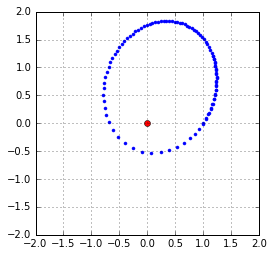

In [9]:
%%time
sol=odeint(mov_planeta,[1,0,0.6,0.9],tiempos)
plot(sol[:,0],sol[:,1],'.')
plot([0],'ro')
axes().set_aspect( 'equal' ),grid(True)
xlim([-2,2]),ylim([-2,2])

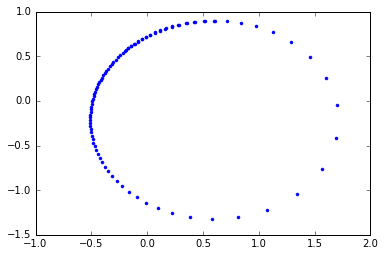

In [10]:
plot(sol[:,2],sol[:,3],'.')